# Loading data items CSV

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_context('paper')
sns.set_style('white')

In [2]:
fname = 'data_items.csv'
df = pd.read_csv(fname, header=1)

In [24]:
df = df.iloc[:195, :]
df = df.dropna(axis=0, how='all')
df = df.dropna(axis=1, how='all', thresh=int(df.shape[0] * 0.1))
df = df[df['Year'] >= 2012]

In [119]:
df.head()

,Title,Year,Authors,Journal / Origin,Arxiv,Lab / School / Company,Pages,Domain 1,Domain 2,Domain 3,...,Analysis of learned parameters,Discussion,Limitations,Code available,Code hosted on,Limited data,Others & Comments,First Reader,Second Reader,Citation
0,EEG-signals based cognitive workload detection...,2018.0,"Almogbel, Dang & Kameyama",IEEE Conference on Advanced Communication Tech...,No,Waseda University,4.0,Classification of EEG signals,Monitoring,Cognitive,...,No,"""This study does not impose in any way a direc...",NaN,No,NaN,No,24 sessions of 15 to 30 minutes over 1 month o...,Yannick,Isabela,Almogbel2018
1,Automatic ocular artifacts removal in EEG usin...,2018.0,"Yang, Duan, Fan, Hu & Wang",Biomedical Signal Processing and Control,No,Key Laboratory of Power Station Automation Tec...,11.0,Improvement of processing tools,Signal cleaning,Artifact handling,...,NaN,"""Compared with the classical OAs removal metho...",NaN,No,NaN,No,Poorly written... :( The way some elements are...,Yannick,Hubert,Yang2018
2,An end-to-end framework for real-time automati...,2018.0,"Patanaik, Ong, Gooley, Ancoli-Israel & Chee",Sleep,No,"Duke-NUS Medical School, Singapore\nUniversity...",11.0,Classification of EEG signals,Clinical,Sleep,...,No,"""... our framework provides a practicable, val...",N/M,No,NaN,No,"Great paper, with most of the information avai...",Yannick,Hubert,Patanaik2018
3,Epileptic Seizure Detection: A Deep Learning A...,2018.0,"Hussein, Palangi, Ward & Wang",Arxiv,Yes,UBC,12.0,Classification of EEG signals,Clinical,Epilepsy,...,No,"Compared to the state-of-the-art methods, this...",Unbalanced class distributions,No,NaN,No,"""To the best of our knowledge, this is the mos...",Yannick,Hubert,Hussein2018
4,Development of a brain computer interface inte...,2018.0,"Perez-Benitez, Perez-Benitez & Espina-Hernandez","IEEE Conference on Electronics, Communications...",No,"National Polytechnic Institute, Mexico",7.0,Classification of EEG signals,BCI,Reactive,...,Yes (visualization of learned parameters),The analysis of the DNN first layer weights re...,N/M,No,NaN,No,They say that it could go up to 220 commands!!...,Yannick,Hubert,Perez-Benitez2018


## Sanity checks

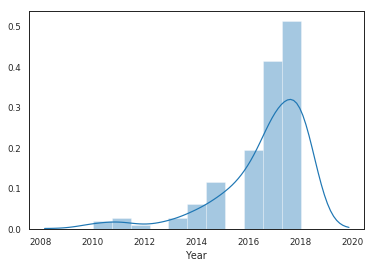

In [15]:
sns.distplot(df['Year'].dropna(axis=0))

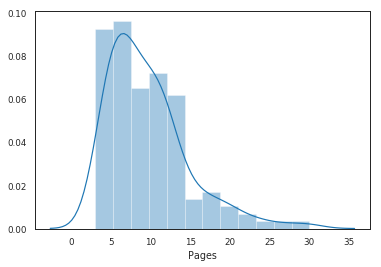

In [17]:
sns.distplot(df['Pages'].dropna(axis=0))

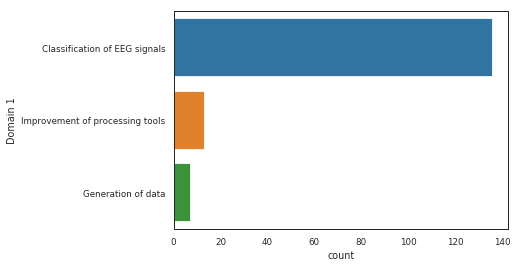

In [19]:
sns.countplot(y='Domain 1', data=df)

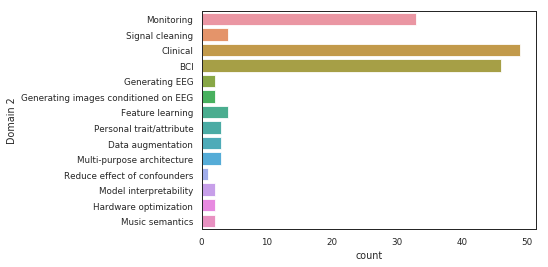

In [20]:
sns.countplot(y='Domain 2', data=df)

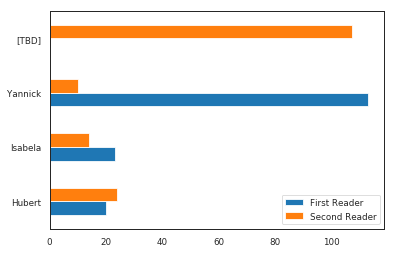

In [21]:
#df[['Analyzed by', 'Reviewed by']].apply(pd.value_counts).plot(kind='barh')
df[['First Reader', 'Second Reader']].apply(pd.value_counts).plot(kind='barh')

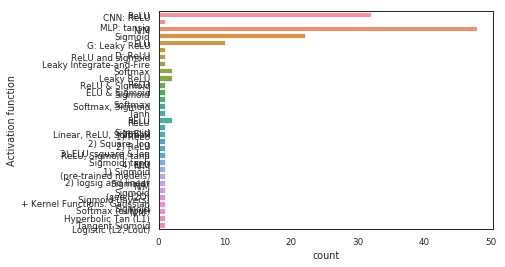

In [22]:
sns.countplot(y='Activation function', data=df)

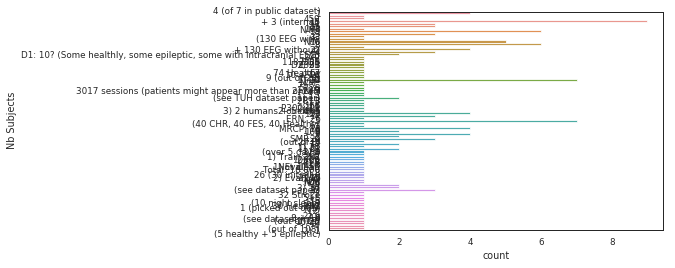

In [23]:
sns.countplot(y='Nb Subjects', data=df)

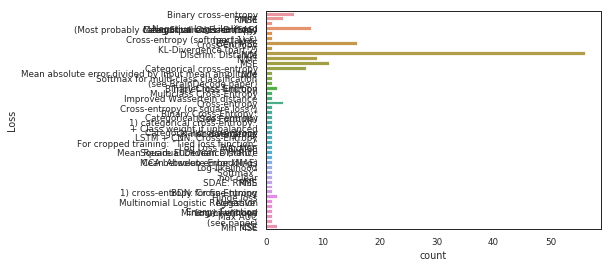

In [24]:
sns.countplot(y='Loss', data=df)

## Domains

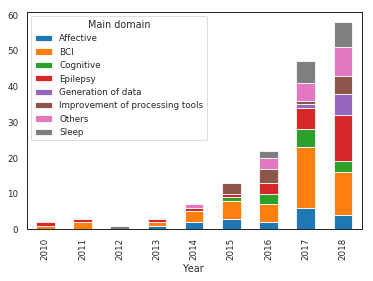

In [25]:
df['Year'] = df['Year'].astype('int32')
main_domains = ['Epilepsy', 'Sleep', 'BCI', 'Affective', 'Cognitive', 
                'Improvement of processing tools', 'Generation of data']
domains_df = df[['Domain 1', 'Domain 2', 'Domain 3', 'Domain 4']]
df['Main domain'] = [row[row.isin(main_domains)].values[0] 
                              if any(row.isin(main_domains)) else 'Others' for ind, row in domains_df.iterrows()]
df.groupby(['Year', 'Main domain']).size().unstack('Main domain').plot(kind='bar', stacked=True, title='')

plt.savefig("./figs/{}.eps".format("Domains per Years"), bbox_inches='tight', format='eps', dpi=1000)

## Baseline types

Text(0,0.5,'')

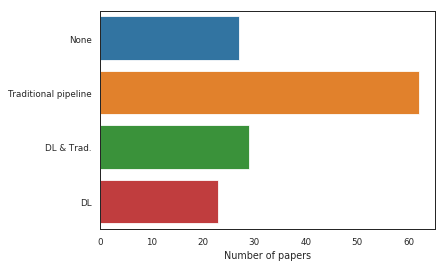

In [26]:
ax = sns.countplot(y='Baseline model type', data=df)
ax.set_xlabel('Number of papers')
ax.set_ylabel('')

## Performance metrics

1. Parse each cell to get all the different elements
2. Make graph

In [133]:
def lstrip(list_of_strs):
    return [a.lstrip().lower() for a in list_of_strs] 
    
metrics = df['Performance metrics (clean)']
metrics = metrics.str.split(',').apply(lstrip)

In [134]:
metric_per_article = list()
for i, metric_list in metrics.iteritems():
    for m in metric_list:
        metric_per_article.append([i, m])

In [144]:
sub_df = df[df['Domain 1'] != 'Classification of EEG signals']
sub_df[sub_df['Performance metrics (clean)'].str.contains('accuracy')]['Title']

1      Automatic ocular artifacts removal in EEG usin...
8      Deep EEG super-resolution: Upsampling EEG spat...
20     Deep Convolution Neural Network and Autoencode...
33     EEG detection and de-noising based on convolut...
34     Data Augmentation for EEG-Based Emotion Recogn...
41     Improving brain computer interface performance...
46     Fair Deep Learning Prediction for Healthcare A...
48     Addressing Class Imbalance in Classification P...
52     Hierarchical internal representation of spectr...
62     Generative Adversarial Networks Conditioned by...
86     Improving classification accuracy of feedforwa...
118    Interpretable Deep Neural Networks for Single-...
122    Removal of EOG artifacts from EEG using a casc...
125    Decoding EEG and LFP signals using deep learni...
131             Deep feature learning for EEG recordings
135    Feature learning from incomplete EEG with deno...
Name: Title, dtype: object

In [142]:
sub_df[]

,Title,Year,Authors,Journal / Origin,Arxiv,Lab / School / Company,Pages,Domain 1,Domain 2,Domain 3,...,Discussion,Limitations,Code available,Code hosted on,Limited data,Others & Comments,First Reader,Second Reader,Citation,acc
1,Automatic ocular artifacts removal in EEG usin...,2018.0,"Yang, Duan, Fan, Hu & Wang",Biomedical Signal Processing and Control,No,Key Laboratory of Power Station Automation Tec...,11.0,Improvement of processing tools,Signal cleaning,Artifact handling,...,"""Compared with the classical OAs removal metho...",NaN,No,NaN,No,Poorly written... :( The way some elements are...,Yannick,Hubert,Yang2018,True
8,Deep EEG super-resolution: Upsampling EEG spat...,2018.0,Corley & Huang,IEEE EMBS International Conference on Biomedic...,No,"University of Texas, San Antonio",4.0,Generation of data,Generating EEG,Spatial upsampling,...,"""Feature scaling techniques besides standard n...","""It was notably difficult and time-consuming t...",No,NaN,No,NaN,Yannick,Isabela,Corley2018,True
11,Generating target / non-target images of an RS...,2018.0,Lee & Huang,IEEE EMBS International Conference on Biomedic...,No,"University of Texas, San Antonio",4.0,Generation of data,Generating images conditioned on EEG,NaN,...,We demonstrated the performance of the propose...,N/M,No,NaN,No,It uses DL on EEG as an input to generate an i...,Yannick,Hubert,Lee2018,False
20,Deep Convolution Neural Network and Autoencode...,2018.0,Wen & Zhang,IEEE Access,No,Xiamen University,12.0,Improvement of processing tools,Feature learning,NaN,...,Less than 4 hidden units on the bottleneck lay...,"""It is very difficult to train multiple hidden...",No,NaN,No,"Interesting approach, but only used one channel!",Hubert,Yannick,Wen2018,True
33,EEG detection and de-noising based on convolut...,2018.0,"Wang, Guo, Zhang, Bai & Wang",International Congress on Image and Signal Pro...,No,Changchun University of Science and Technology...,6.0,Improvement of processing tools,Signal cleaning,Artifact handling,...,The results show that the method in this paper...,N/M,No,NaN,No,They seem to use the CNN just to detect if the...,Yannick,[TBD],Wang2018a,True
34,Data Augmentation for EEG-Based Emotion Recogn...,2018.0,"Wang, Zhong, Peng, Jiang & Liu",International Conference on Multimedia Modeling,No,Shenzhen University\nThe Hong Kong Polytechnic...,12.0,Generation of data,Data augmentation,NaN,...,"By analyzing the experimental result, we find ...",N/M,No,NaN,Yes,Interesting results on the first dataset.\nThe...,Yannick,Hubert,Wang2018,True
37,EEG-GAN: Generative adversarial networks for e...,2018.0,"Hartmann, Schirrmeister & Ball",Arxiv,Yes,University of Freiburg,7.0,Generation of data,Generating EEG,NaN,...,The metrics did not correlate with visual perf...,Mode collapse in GANs,No,NaN,No,Very descriptive on the DL side.,Hubert,Isabela,Hartmann2018,False
41,Improving brain computer interface performance...,2018.0,Zhang & Liu,Arxiv,Yes,Beijing Institute of Technology,NaN,Generation of data,Data augmentation,NaN,...,Data augmentation with GAN is does help increa...,Limited amount of data available per subject w...,No,NaN,Yes,Definitely a first draft - a lot of missing in...,Hubert,Yannick,Zhang2018b,True
46,Fair Deep Learning Prediction for Healthcare A...,2018.0,"Wu, Wang, Cao, Chen, Xing",Arxiv,Yes,Beijing University of Posts and Telecommunicat...,12.0,Improvement of processing tools,Reduce effect of confounders,NaN,...,The use of confounding filtering improves the ...,N/M,Yes,GitHub,No,Nice paper. The proposed method (confounding f...,Isabela,[TBD],Wu2018,True
48,Addressing Class Imbalance in Classification P...,2018.0,"Schwabedal, Snyder, Cakmak, Nemati & Clifford",Arxiv,Yes,Emory University,7.0,Generation of data,Data augmentation,NaN,...,Increases in the S2-accuracy seemed to be at t...,"Unfortunately, we were not yet able to evaluat...",Yes,GitHub,Yes,Using FT Surrogates to generate Raw EEG is ass...,Yannick,[TBD],Schwabedal2018,True


In [127]:
metrics_df = pd.DataFrame(metric_per_article, columns=['paper nb', 'metric'])

In [128]:
metrics_df

,paper nb,metric
0,1,rmse
1,1,accuracy
2,8,mse
3,8,mae
4,8,accuracy
5,8,precision
6,8,recall
7,11,visual inspection
8,20,accuracy
9,33,accuracy


In [129]:
# Replace equivalent terms by standardized term
equivalences = {'selectivity': 'specificity',
                 'true negative rate': 'specificity',
                 'sensitivitiy': 'sensitivity',
                 'sensitivy': 'sensitivity',
                 'recall': 'sensitivity',
                 'hit rate': 'sensitivity', 
                 'true positive rate': 'sensitivity',
                 'sensibility': 'sensitivity',
                 'positive predictive value': 'precision',
                 'f-measure': 'f1-score',
                 'f-score': 'f1-score',
                 'f1-measure': 'f1-score',
                 'macro f1-score': 'f1-score',
                 'macro-averaging f1-score': 'f1-score',
                 'kappa': 'cohen\'s kappa',
                 'mae': 'mean absolute error',
                 'false negative rate': 'false negatives',
                 'fpr': 'false positives',
                 'false positive rate': 'false positives',
                 'false prediction rate': 'false positives',
                 'roc curves': 'roc',
                 'rmse': 'mean squared error',
                 'mse': 'mean squared error',
                 'training time': 'time',
                 'testing time': 'time',
                 'test error': 'error'}

"""
Assumptions, simplifications:
- Rates have been simplified (e.g., "false positive rate" -> "false positives")
- RMSE and MSE have been merged under MSE
- Training/testing times have been simplified to "time"
- Macro f1-score === f1=score
"""

metrics_df = metrics_df.replace(equivalences)

# Removing low count categories
metrics_counts = metrics_df['metric'].value_counts()
metrics_df = metrics_df[metrics_df['metric'].isin(metrics_counts[(metrics_counts >= 1)].index)]

Text(0,0.5,'')

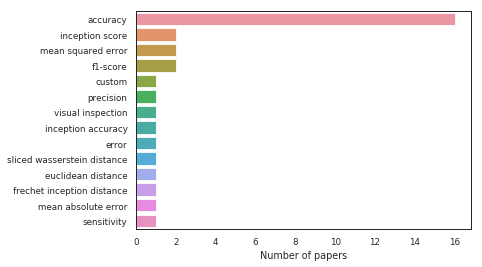

In [130]:
fig, ax = plt.subplots() #figsize=(10, 20))
ax = sns.countplot(y='metric', data=metrics_df, order=metrics_df['metric'].value_counts().index)
ax.set_xlabel('Number of papers')
ax.set_ylabel('')

## Yannick addons. (temp stuff)

#1 - Download:
https://docs.google.com/spreadsheet/ccc?key=1smpU0WSlSq-Al2u_QH3djGn68mTuHlth2fNJTrD3wa8&output=csv

#2 - Rename it to "papers.csv"

In [67]:
%matplotlib inline

fname = 'papers.csv'
df = pd.read_csv(fname, header=1)

In [69]:
df = df.dropna(axis=0, how='all')
df = df.dropna(axis=1, how='all', thresh=int(df.shape[0] * 0.1))

In [57]:
print(str(len(df)) + " studies.")
df.head()

156 studies.


,Title,Year,Authors,Journal / Origin,Arxiv,Lab / School / Company,Pages,Domain,domain1,domain2,...,Analysis of learned parameters,Discussion,Limitations,Code available,Code hosted on,Limited data,Others & Comments,First Reader,Second Reader,Citation
0,EEG-signals based cognitive workload detection...,2018.0,"Almogbel, Dang & Kameyama",IEEE Conference on Advanced Communication Tech...,No,Waseda University,4.0,Transportation,Classification of EEG signals,Monitoring,...,No,"""This study does not impose in any way a direc...",NaN,No,NaN,No,24 sessions of 15 to 30 minutes over 1 month o...,Yannick,Isabela,Almogbel2018
1,Automatic ocular artifacts removal in EEG usin...,2018.0,"Yang, Duan, Fan, Hu & Wang",Biomedical Signal Processing and Control,No,Key Laboratory of Power Station Automation Tec...,11.0,Cleaning EEG Signals,Improvement of processing tools,Signal cleaning,...,NaN,"""Compared with the classical OAs removal metho...",NaN,No,NaN,No,Poorly written... :( The way some elements are...,Yannick,Hubert,Yang2018
2,An end-to-end framework for real-time automati...,2018.0,"Patanaik, Ong, Gooley, Ancoli-Israel & Chee",Sleep,No,"Duke-NUS Medical School, Singapore\nUniversity...",11.0,Sleep,Classification of EEG signals,Clinical,...,No,"""... our framework provides a practicable, val...",N/M,No,NaN,No,"Great paper, with most of the information avai...",Yannick,Hubert,Patanaik2018
3,Epileptic Seizure Detection: A Deep Learning A...,2018.0,"Hussein, Palangi, Ward & Wang",Arxiv,Yes,UBC,12.0,Epilepsy,Classification of EEG signals,Clinical,...,No,"Compared to the state-of-the-art methods, this...",Unbalanced class distributions,No,NaN,No,"""To the best of our knowledge, this is the mos...",Yannick,Hubert,Hussein2018
4,Development of a brain computer interface inte...,2018.0,"Perez-Benitez, Perez-Benitez & Espina-Hernandez","IEEE Conference on Electronics, Communications...",No,"National Polytechnic Institute, Mexico",7.0,BCI,Classification of EEG signals,BCI,...,Yes (visualization of learned parameters),The analysis of the DNN first layer weights re...,N/M,No,NaN,No,They say that it could go up to 220 commands!!...,Yannick,Hubert,Perez-Benitez2018


In [72]:
# Inspired by: AKuederle
# https://github.com/AKuederle/Py-Tex-automation-example

import pandas as pd
import tex_utils

#papers = pd.read_csv('./paperx.csv')
#papers = pd.read_csv('./papers.csv', header=1)
papers = df

papers = papers.dropna(axis=1, how='all')

# ===============================================
# Need to run Main Domains Cell before this one!
# ===============================================
domains = set(papers['Main domain'].dropna(axis=0, how='all'))

nested_datasets = {}

for domain in domains:
    print('Domain:' + domain)

    sub_papers = papers[papers['Main domain'] == domain]
    sub_datasets = sub_papers['Dataset name'].dropna(axis=0, how='all')

    # 1 Paper might use multiple datasets
    l = [dsname.split(";\n") for dsname in sub_datasets]
    sub_datasets = set([item for sublist in l for item in sublist])

    # ========================================
    # Handle exception to make it "prettier".
    # Exception 1: Combining datasets.
    # - BCI Competition Datasets.
    # ========================================
    tex_utils.combine_datasets(sub_datasets, "BCI Competition")
    tex_utils.combine_datasets(sub_datasets, "TUH")

    # Step 3 - Create nested list of publications per dataset for this domain.
    nested_list = {k: list(sub_papers[sub_papers['Dataset name'].str.contains(k)]['Citation']) for k in sub_datasets}

    # ========================================
    # Handle exception to make it "prettier".
    # Exception 2: Datasets used only once.
    # ========================================
    toBeRemoved = []
    others = []
    for dataset in nested_list:
        if len(nested_list[dataset]) < 2:
            others.append(nested_list[dataset])
            toBeRemoved.append(dataset)

    for dataset in toBeRemoved:
        nested_list.pop(dataset)

    others = [val for sublist in others for val in sublist]
    if len(others) > 0:
        nested_list['Other Datasets'] = others

    #if 'Internal Recordings' in nested_list:
    #    nested_list = move_element(nested_list, "Internal Recordings", 1)
    #if 'Others' in nested_list:
    #    nested_list = move_element(nested_list, "Others", 2)

    # Step 4 - Save the final list of papers per dataset for this domain.
    nested_datasets[domain] = nested_list

print('LaTeX!')
template = tex_utils.get_template('./table_template.tex')
variable_dict = {'datasets': nested_datasets}
texstr = tex_utils.compile_pdf_from_template(template, variable_dict, './dataset_table.pdf')
print('Done!')

Domain:Generation of data
Domain:BCI
Domain:Affective
Domain:Epilepsy
Domain:Sleep
Domain:Others
Domain:Cognitive
Domain:Improvement of processing tools
LaTeX!
/Users/yannick/Documents/PhD/DL-EEG_Portal/dl-eeg-review/tex_build


/Users/yannick/anaconda/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:39: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.


Done!


## Data Accessibility

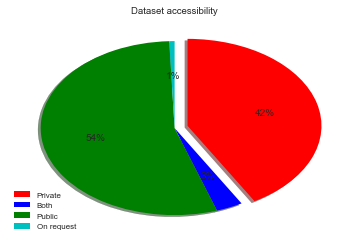

In [130]:
col_name = 'Dataset accessibility'
col_options = ['Private', 'Both', 'Public', 'On request']
values = [df[col_name].value_counts()[col_options[0]], df[col_name].value_counts()[col_options[1]], df[col_name].value_counts()[col_options[2]], df[col_name].value_counts()[col_options[3]]]
colors = ['r', 'b', 'g', 'c']
explode = (0.1, 0, 0, 0)

fig = plt.figure()
plt.pie(values, colors=colors, explode=explode, counterclock=False, shadow=True, autopct='%1.0f%%', startangle=90)
plt.title(col_name)
plt.legend(col_options, loc=3)
plt.savefig("./figs/{}.eps".format(col_name), bbox_inches='tight', format='eps', dpi=1000) # Needs to be before plt.show()
plt.show()

## Code Accessibility

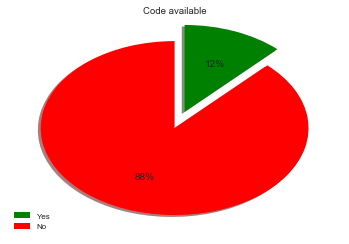

15             Kuanar2018
21     Schirrmeister2017a
35               Sors2018
38             Zhang2018a
46                 Wu2018
48         Schwabedal2018
56            Lawhern2018
71      Schirrmeister2017
73             Zhang2017g
75             Zhang2017d
77           Supratak2017
80             Zhang2017e
81             Zhang2017c
103        Loshchilov2017
104        Spampinato2017
128         Bashivan2016a
131            Stober2015
149                 [TBD]
156         Langkvist2012
Name: Citation, dtype: object


In [60]:
col_name = 'Code available'
col_options = ['Yes', 'No']    # To control the order and plot color/explode.
values = [df[col_name].value_counts()[col_options[0]], df[col_name].value_counts()[col_options[1]]]
colors = ['g', 'r']
explode = (0.2, 0)

fig = plt.figure()
plt.pie(values, colors=colors, explode=explode, counterclock=False, shadow=True, autopct='%1.0f%%', startangle=90)
plt.title(col_name)
plt.legend(col_options, loc=3)
plt.savefig("./figs/{}.eps".format(col_name), bbox_inches='tight', format='eps', dpi=1000) # Needs to be before plt.show()
plt.show()

print(df[df['Code available'] == 'Yes']['Citation'])

## Code Sharing Platforms

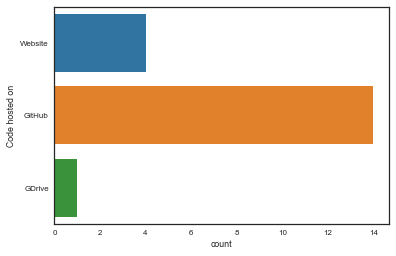

In [59]:
sns.countplot(y='Code hosted on', data=df[df['Code hosted on'] != 'N/A'])
plt.savefig("./figs/{}.eps".format('Code hosted on'), bbox_inches='tight', format='eps', dpi=1000) # Needs to be before plt.show()

## Limited Data Available

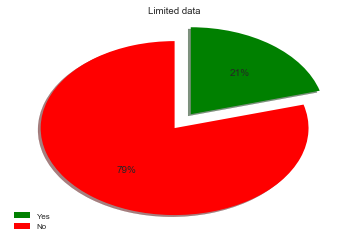

In [103]:
col_name = 'Limited data'
col_options = ['Yes', 'No']    # To control the order and plot color/explode.
values = [df[col_name].value_counts()[col_options[0]], df[col_name].value_counts()[col_options[1]]]
colors = ['g', 'r']
explode = (0.2, 0)

fig = plt.figure()
plt.pie(values, colors=colors, explode=explode, counterclock=False, shadow=True, autopct='%1.0f%%', startangle=90)
plt.title(col_name)
plt.legend(col_options, loc=3)
plt.savefig("./figs/{}.eps".format(col_name), bbox_inches='tight', format='eps', dpi=1000) # Needs to be before plt.show()
plt.show()

# Datasets

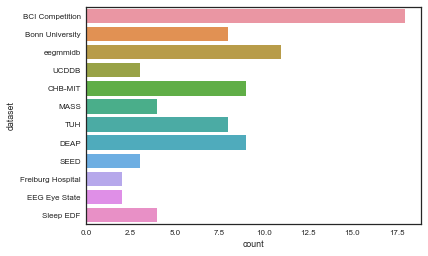

In [95]:
import collections

def remove_me(ds, item_name):
    ds2 = [y for y in ds if y != item_name]
    return ds2

datasets = df['Dataset name']
datasets_full = [dsname.split(";\n") for dsname in datasets]
datasets_ffull = [item for sublist in datasets_full for item in sublist]  

# Combining Datasets
combine_ds = ["BCI Competition", "TUH"]
for c in combine_ds:
    for n, i in enumerate(datasets_ffull):
        if c in i:
            datasets_ffull[n] = c

# Removing Datasets
a = remove_me(datasets_ffull,"Internal Recordings")
for ds in collections.Counter(a).items():
    if ds[1] < 2:
        #print("Removing (<2): " + ds[0])
        a = remove_me(a, ds[0])
        
ds_df = (pd.DataFrame.from_dict(collections.Counter(a), orient='index').reset_index()).rename(columns={'index':'dataset', 0:'count'})
#print(ds_df)

ax = sns.barplot(y='dataset', x='count', data=ds_df)

plt.savefig("./figs/{}.eps".format("Datasets"), bbox_inches='tight', format='eps', dpi=1000) # Needs to be before plt.show()
plt.show()

# Network Graph/Table/Schema

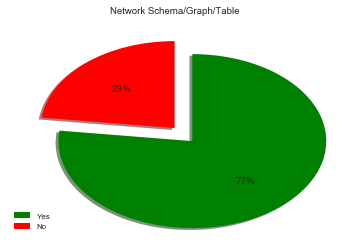

In [106]:
col_name = 'Network Schema/Graph/Table'
col_options = ['Yes', 'No']    # To control the order and plot color/explode.
values = [df[col_name].value_counts()[col_options[0]], df[col_name].value_counts()[col_options[1]]]
colors = ['g', 'r']
explode = (0.2, 0)

fig = plt.figure()
plt.pie(values, colors=colors, explode=explode, counterclock=False, shadow=True, autopct='%1.0f%%', startangle=90)
plt.title(col_name)
plt.legend(col_options, loc=3)
plt.savefig("./figs/{}.eps".format("Network Schema"), bbox_inches='tight', format='eps', dpi=1000) # Needs to be before plt.show()
plt.show()

# Reproducibility - Easy/Medium/Hard/Impossible

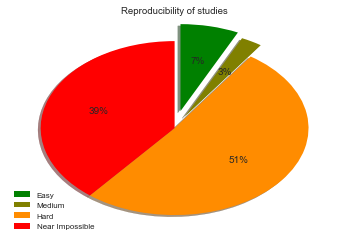

Easy:
21     Schirrmeister2017a
35               Sors2018
48         Schwabedal2018
73             Zhang2017g
75             Zhang2017d
77           Supratak2017
81             Zhang2017c
103        Loshchilov2017
104        Spampinato2017
131            Stober2015
156         Langkvist2012
Name: Citation, dtype: object
Medium:
38           Zhang2018a
56          Lawhern2018
71    Schirrmeister2017
80           Zhang2017e
Name: Citation, dtype: object


In [45]:
df_easy = df[(df['Code available'] == 'Yes') & (df['Dataset accessibility'] == 'Public')] # Shared Code + Data.
df_medium = df[(df['Code available'] == 'Yes') & (df['Dataset accessibility'] == 'Both')] # Shared Code + Private & Public Data.
df_impossible = df[(df['Code available'] == 'No') & (df['Dataset accessibility'] == 'Private')] # Nothing is shared.

a = len(df_easy)
b = len(df_medium)
c = len(df_impossible)
d = len(df) - a - b - c

col_name = 'Reproducibility of studies'
col_options = ['Easy', 'Medium', 'Hard', 'Near Impossible']    # To control the order and plot color/explode.
values = [a,b,d,c]
colors = ['g', 'olive', 'darkorange', 'r']
explode = (0.2, 0.15, 0, 0)

fig = plt.figure()
plt.pie(values, colors=colors, explode=explode, counterclock=False, shadow=True, autopct='%1.0f%%', startangle=90)
plt.title(col_name)
plt.legend(col_options, loc=3)
plt.savefig("./figs/{}.eps".format("Reproducibility of studies"), bbox_inches='tight', format='eps', dpi=1000) # Needs to be before plt.show()
plt.show()

print('Easy:')
print(df_easy['Citation'])
print('Medium:')
print(df_medium['Citation'])